In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy as sp

In [284]:
data = pd.read_csv('owid-covid-data.csv')
data.shape

(134015, 67)

In [285]:
 pd.set_option('display.max_columns', None)

In [286]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134015 entries, 0 to 134014
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134015 non-null  object 
 1   continent                                   125463 non-null  object 
 2   location                                    134015 non-null  object 
 3   date                                        134015 non-null  object 
 4   total_cases                                 126652 non-null  float64
 5   new_cases                                   126650 non-null  float64
 6   new_cases_smoothed                          125607 non-null  float64
 7   total_deaths                                115487 non-null  float64
 8   new_deaths                                  115683 non-null  float64
 9   new_deaths_smoothed                         125607 non-null  float64
 

In [288]:
data.isna().sum()

iso_code                                        0
continent                                    8552
location                                        0
date                                            0
total_cases                                  7363
                                            ...  
human_development_index                     18110
excess_mortality_cumulative_absolute       129292
excess_mortality_cumulative                129292
excess_mortality                           129292
excess_mortality_cumulative_per_million    129292
Length: 67, dtype: int64

In [289]:
data.continent.value_counts()

Africa           33133
Europe           30645
Asia             30580
North America    17038
South America     7652
Oceania           6415
Name: continent, dtype: int64

In [290]:
data.drop(columns=["weekly_icu_admissions", "weekly_icu_admissions_per_million" ,"weekly_hosp_admissions", "weekly_hosp_admissions_per_million","excess_mortality","excess_mortality_cumulative_absolute","excess_mortality_cumulative","excess_mortality_cumulative_per_million"], inplace=True)

In [291]:
data[pd.isna(data.total_cases)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
633,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,0.003,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1278,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,13.0,0.005,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1279,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,17.0,0.006,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1280,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.0,0.006,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2.872934e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131539,WLF,Oceania,Wallis and Futuna,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,1893.0,4.0,0.036,NaN,1.109400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
131540,WLF,Oceania,Wallis and Futuna,2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1713.0,4.0,0.036,NaN,1.109400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
131541,WLF,Oceania,Wallis and Futuna,2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,1532.0,3.0,0.027,NaN,1.109400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
131542,WLF,Oceania,Wallis and Futuna,2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,1262.0,3.0,0.027,NaN,1.109400e+04,NaN,NaN,N

In [292]:
data=data[data['total_cases'].notna()]

In [293]:
data=data[data['total_deaths'].notna()]

In [294]:
print(sorted(data.location.unique()))

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'High income', 'Honduras', 'Hong Kong', 'Hungary

In [295]:
data[["date"]] = data[["date"]].apply(lambda _: pd.to_datetime(_, format='%Y/%m/%d'))

In [296]:
data[["continent"]] = data[["continent"]].fillna(value="other")

In [297]:
for column in data.select_dtypes(include=[object]).columns:
    print(column, sorted(data[column].unique()), sep="\n\t")
    print("-------------------------")

iso_code
	['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'OWID_AFR', 'OWID_ASI', 'OWID_EUN', 'OWID_EUR', 'OWID_HIC', 'OWID_INT', 

TypeError: '<' not supported between instances of 'str' and 'float'

In [298]:
for column in data.select_dtypes(include=[object]).columns:
    data[column] =data[column].astype('category')

In [299]:
data.isna().sum()

iso_code                                           0
continent                                          0
location                                           0
date                                               0
total_cases                                        0
new_cases                                          4
new_cases_smoothed                                77
total_deaths                                       0
new_deaths                                         4
new_deaths_smoothed                               77
total_cases_per_million                          637
new_cases_per_million                            641
new_cases_smoothed_per_million                   714
total_deaths_per_million                         637
new_deaths_per_million                           641
new_deaths_smoothed_per_million                  714
reproduction_rate                              12587
icu_patients                                   99670
icu_patients_per_million                      

In [300]:
data["total_deaths_normalized"]=np.log10((data["total_deaths"]))
data["diabetes_prevalence_normalized"]=np.log10((data["diabetes_prevalence"]))


In [301]:
##df=data.groupby(by =["continent", "total_deaths"]).size().unstack()

In [302]:
gb=data.groupby('continent').total_deaths_normalized.sum().sort_values(ascending=True)

In [303]:
gb_df=pd.DataFrame(gb)

In [304]:
gb_df

,total_deaths_normalized
continent,
Oceania,3691.569049
South America,25830.332307
North America,32021.964968
other,39226.048262
Africa,69759.896057
Asia,75731.826586
Europe,86876.590788


[Text(0, 0, 'Ocenia'),
 Text(1, 0, 'Africa'),
 Text(2, 0, 'Asia'),
 Text(3, 0, 'South America'),
 Text(4, 0, 'North America'),
 Text(5, 0, 'Europe'),
 Text(6, 0, 'other')]

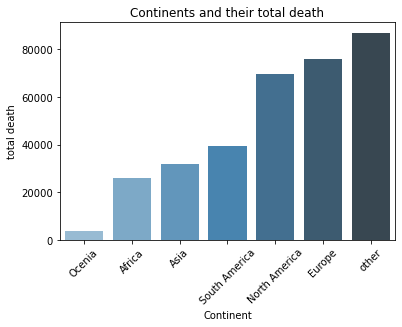

In [305]:
viz_1=sns.barplot(x=["Ocenia","Africa","Asia","South America","North America","Europe","other"], y="total_deaths_normalized", data=gb_df,
                 palette='Blues_d')
viz_1.set_title('Continents and their total death')
viz_1.set_ylabel('total death')
viz_1.set_xlabel('Continent')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [306]:
data=data[data['aged_70_older'].notna()]

In [307]:
data=data[data['population_density'].notna()]
data=data[data['new_cases'].notna()]

In [308]:
data=data[data['new_cases']>0]

In [309]:
data["population_density_normalized"]=np.log10((data["population_density"]))
data["new_cases_normalized"]=np.log10((data["new_cases"]))

In [310]:
data["aged_70_older_normalized"]=np.log2((data["aged_70_older"]))

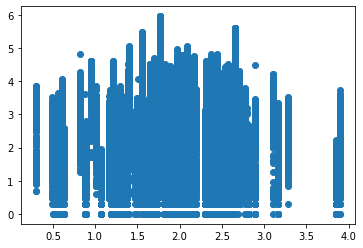

In [311]:
#sns.regplot(x=data["population_density_normalized"], y=data["new_cases_normalized"])
#a = data.groupby('population_density_normalized')[['new_cases_normalized']].mean()
#a.plot()
#plt.show()
plt.scatter(data["population_density_normalized"],data["new_cases_normalized"] )
plt.show()

In [312]:
gb2=data.groupby('continent').aged_70_older_normalized.sum().sort_values(ascending=True)

In [313]:
gb2_df=pd.DataFrame(gb2)
gb2_df

,aged_70_older_normalized
continent,
other,1609.889572
Oceania,4183.757801
South America,15700.267141
North America,22205.027287
Africa,22235.176949
Asia,40727.132568
Europe,79455.843559


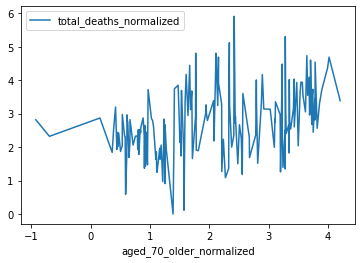

In [314]:
a = data.groupby('aged_70_older_normalized')[['total_deaths_normalized']].mean()
a.plot()
plt.show()

diabete and  corrolation

In [315]:
data["diabetes_prevalence"]= data["diabetes_prevalence"].fillna(value=0)

In [316]:
data["diabetes_prevalence"].value_counts().max()

6150

In [317]:
from scipy.stats.stats import spearmanr
x=data["diabetes_prevalence"].to_numpy()

y=data["total_deaths_normalized"].to_numpy()

sp.stats.spearmanr(x, y, axis=0, nan_policy='propagate', alternative='two-sided')

SpearmanrResult(correlation=0.06807672319431193, pvalue=2.546152392652483e-89)

In [318]:
data["hospital_beds_per_thousand"]

28        0.5
29        0.5
30        0.5
31        0.5
32        0.5
         ... 
134010    1.7
134011    1.7
134012    1.7
134013    1.7
134014    1.7
Name: hospital_beds_per_thousand, Length: 86444, dtype: float64

<AxesSubplot:xlabel='hospital_beds_per_thousand', ylabel='total_deaths_normalized'>

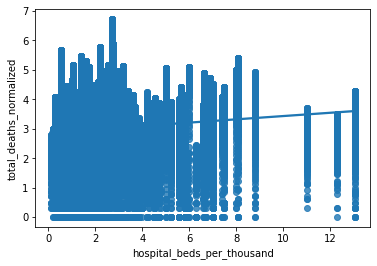

In [319]:
sns.regplot(x=data["hospital_beds_per_thousand"], y=data["total_deaths_normalized"])

In [345]:
data[["handwashing_facilities"]] = data[["handwashing_facilities"]].fillna(value=data["handwashing_facilities"].mode())

In [346]:

data["handwashing_facilities_normalized"]=np.log10(data["handwashing_facilities"])

In [347]:
gb3=data.groupby('continent').handwashing_facilities_normalized.sum().sort_values(ascending=True)

In [348]:
gb3_df=pd.DataFrame(gb3)
gb3_df

,handwashing_facilities_normalized
continent,
Oceania,2.803111
other,1183.095651
Europe,2141.068477
South America,5946.930803
North America,11914.025642
Asia,21332.745062
Africa,23661.574164


In [349]:
gb4=data.groupby('continent').new_cases_normalized.sum().sort_values(ascending=True)

In [350]:
gb4_df=pd.DataFrame(gb4)
gb4_df

,new_cases_normalized
continent,
Oceania,2147.681074
other,3559.670814
South America,19640.792289
North America,22076.820004
Africa,39279.237912
Europe,60714.123573
Asia,61039.528147


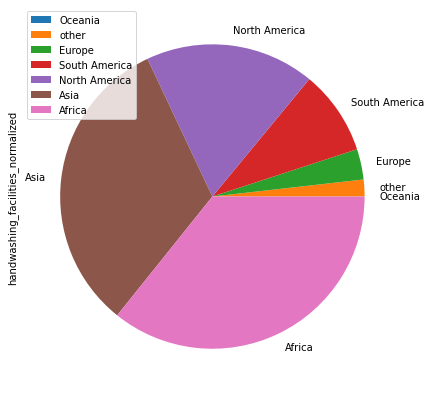

In [351]:
plot=gb3_df.plot.pie(y="handwashing_facilities_normalized", figsize=(7, 7) )

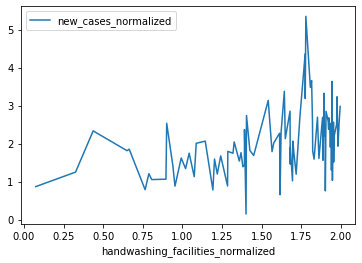

In [360]:
#sns.regplot(x=data["new_cases_normalized"], y=data["handwashing_facilities_normalized"])
a = data.groupby("handwashing_facilities_normalized")[['new_cases_normalized']].mean()
a.plot()
plt.show()

In [356]:
data[["stringency_index"]] = data[["stringency_index"]].fillna(value=0)

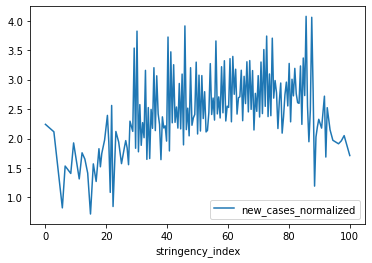

In [359]:
a = data.groupby("stringency_index")[['new_cases_normalized']].mean()
a.plot()
plt.show()

<AxesSubplot:>

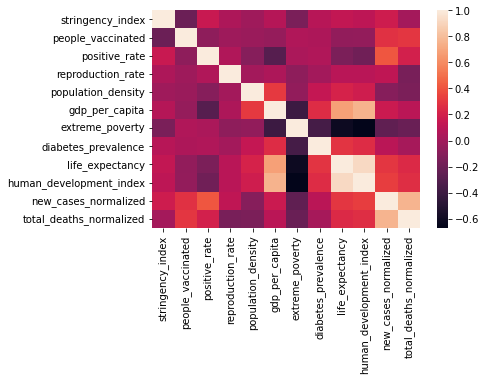

In [380]:
import pandas as pd

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = data[["stringency_index", "people_vaccinated", "positive_rate", "reproduction_rate", "population_density", "gdp_per_capita", "extreme_poverty", "diabetes_prevalence", "life_expectancy", "human_development_index",'new_cases_normalized',"total_deaths_normalized"] ].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='stringency_index', ylabel='new_cases_normalized'>

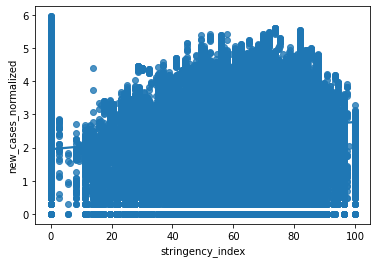

In [384]:
sns.regplot(x=data["stringency_index"], y=data["new_cases_normalized"])

<AxesSubplot:xlabel='continent', ylabel='new_cases_normalized'>

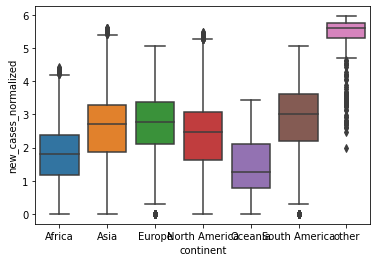

In [391]:

sns.boxplot( x=data["continent"], y=data["new_cases_normalized"] )